# Lab 2 - Sample solution

This jupyter notebook contains a sample solution for Week 03 - Lab 02.

To make sure you can run the entire notebook, check if you have the required libraries installed:

```{pytnon}
pip install -U pandas matplotlib seaborn
```

We first start by loading the required libraries. For this particular solution we need to load the `pandas` library:

In [1]:
import pandas as pd

Now that we have the module loaded, let's read the csv dataset. To do that, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function provided by the module. Note that we need to set the `sep` parameter to `','` given that is used to structure the file.

***Tip***: whenever possible, check the csv file before trying to read it to check for  the file structure and the types of separator is used.

In [2]:
df = pd.read_csv('/Users/brendan.tierney/Dropbox/4-Datasets/trainingset.csv', sep=',')

Now, let's inspect the first few lines of the dataset to see what the data looks like.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        24570 non-null  float64
 1   job        24314 non-null  object 
 2   marital    22849 non-null  object 
 3   education  20647 non-null  object 
 4   default    23798 non-null  object 
 5   balance    22510 non-null  float64
 6   housing    25830 non-null  object 
 7   loan       25247 non-null  object 
 8   contact    23762 non-null  object 
 9   day        24364 non-null  float64
 10  month      25496 non-null  object 
 11  duration   23545 non-null  float64
 12  campaign   22815 non-null  float64
 13  pdays      24138 non-null  float64
 14  previous   24875 non-null  float64
 15  poutcome   26817 non-null  object 
 16  y          27272 non-null  object 
dtypes: float64(7), object(10)
memory usage: 3.5+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44.0,JobCat9,NaN,secondary,no,29.0,yes,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
1,47.0,JobCat3,married,unknown,no,1506.0,yes,NaN,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
2,31.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
3,26.0,JobCat6,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
4,42.0,JobCat4,divorced,tertiary,NaN,2.0,yes,no,unknown,5.0,may,NaN,1.0,-1.0,0.0,unknown,TypeA


## Data quality report

Now we start building the data quality report for the dataset provided.

`pandas` has a nice built-in function to generate such reports: the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function. You have to call it using the same variable you stored the dataset after reading:

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,24570.000000,22510.000000,24364.000000,23545.0,22815.000000,24138.000000,24875.000000
mean,39.894302,1373.054687,15.779059,0.0,2.744773,39.980943,0.578251
std,11.445373,3100.869406,8.295287,0.0,3.018258,100.027931,1.943030
min,16.000000,-6847.000000,1.000000,0.0,1.000000,-1.000000,0.000000
25%,31.000000,71.000000,8.000000,0.0,1.000000,-1.000000,0.000000
50%,37.000000,443.000000,16.000000,0.0,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,0.0,3.000000,-1.000000,0.000000
max,93.000000,98417.000000,31.000000,0.0,63.000000,871.000000,58.000000


Notice 2 things about the output: 

1.   The generated report have the features on the columns and the statistics on the rows. When you have lots of features, that can make the visulization and comparison of the statistics difficult.
2.   The generated report only contains the continuous features.


Let's first fix the position of features and the statistics. To do that, we must add a new function call after the `describe` function: the `transpose` function. This second function call will transpose the rows and columns of the report so it will much easier to visualize the statistics when we have dozen of features in our dataset.



In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,24570.0,39.894302,11.445373,16.0,31.0,37.0,48.0,93.0
balance,22510.0,1373.054687,3100.869406,-6847.0,71.0,443.0,1423.0,98417.0
day,24364.0,15.779059,8.295287,1.0,8.0,16.0,21.0,31.0
duration,23545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
campaign,22815.0,2.744773,3.018258,1.0,1.0,2.0,3.0,63.0
pdays,24138.0,39.980943,100.027931,-1.0,-1.0,-1.0,-1.0,871.0
previous,24875.0,0.578251,1.943030,0.0,0.0,0.0,0.0,58.0


Notice how it looks much nicer now.

Let's now fix the categorical features. By default, `pandas` runs the describe function for numerical values given that the rport for continuous and categorical features are different.

To generate a report for categorical features, we must tell the `describe`function what types of features we want to include in the report, we have to pass the parameter `include` to the function and inform which fatures we want. In `pandas`, categorical features are defined either as python `objects` or pandas `category` type. Let's generate our report for the categorical features and transpose the columns of the report at the same time for an easier visualization.

In [7]:
df.describe(include=['object', 'category']).transpose()

,count,unique,top,freq
job,24314,12,JobCat3,5298
marital,22849,3,married,13782
education,20647,4,secondary,10573
default,23798,2,no,23368
housing,25830,2,yes,14336
loan,25247,2,no,21228
contact,23762,3,cellular,15300
month,25496,12,may,7758
poutcome,26817,4,unknown,21951
y,27272,2,TypeA,24030


## Visualizations

Now that we generated the data quality report, let's generate the visualizations for the distributions of each feature.

For that, we will use another `pandas`' built-in function: the `plot` function. When calling that function, we must pass the parameter `kind` to inform what type of plot we wish to display.

In addition, as we are ploting individual features, we must first select the feature we want to visualize.

***Tip***: set the `title` parameter of the plot function to make it easier to find particular plots in your notebook.


>  #### Continuous features - histograms 
> For visualizing continuous features, we use histograms. To inform pandas to generate an histogram, we set the parameter `kind='hist'`.

<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

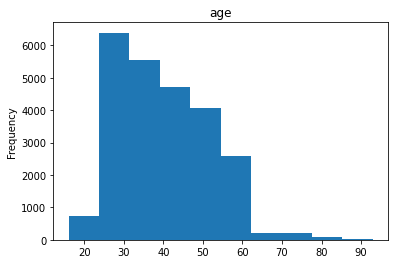

In [14]:
df['age'].plot(kind='hist', title='age')

<AxesSubplot:title={'center':'balance'}, ylabel='Frequency'>

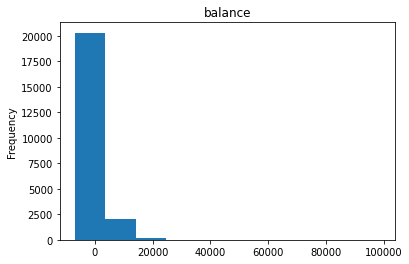

In [9]:
df['balance'].plot(kind='hist', title='balance')

<AxesSubplot:title={'center':'day'}, ylabel='Frequency'>

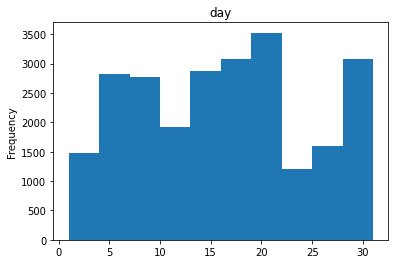

In [10]:
df['day'].plot(kind='hist', title='day')

<AxesSubplot:title={'center':'duration'}, ylabel='Frequency'>

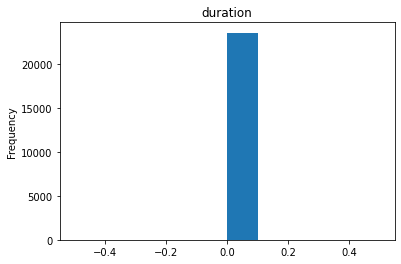

In [11]:
df['duration'].plot(kind='hist', title='duration')

<AxesSubplot:title={'center':'campaign'}, ylabel='Frequency'>

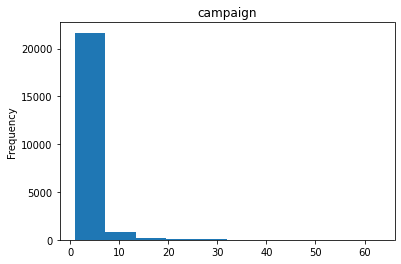

In [12]:
df['campaign'].plot(kind='hist', title='campaign')

<AxesSubplot:title={'center':'pdays'}, ylabel='Frequency'>

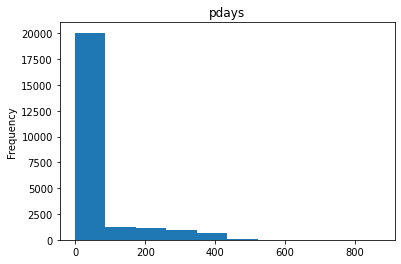

In [13]:
df['pdays'].plot(kind='hist', title='pdays')

<AxesSubplot:title={'center':'previous'}, ylabel='Frequency'>

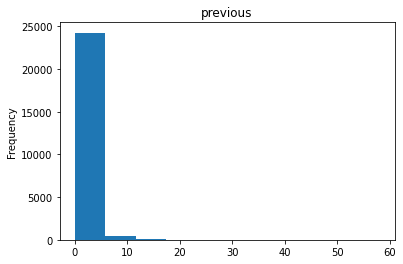

In [15]:
df['previous'].plot(kind='hist',  title='previous')

>  #### Categorical features - bar plots 
> For visualizing categorical features, we use bar plots. To inform pandas to generate a bar plot, we set the parameter `kind='bar'`. However, that is not enough for the `plot` function as it doesn't know how to plot categories. To be able to generate such plots, we must generate the counts (frequency) of each category and provide those counts to the plot function. Fortunately, there is a buil-in function in pandas that does exactly that for us: `value_counts`.
> 
> To use it, we first select the feature we want to plot and then we call the `value_counts` function. Finally, we call the plot function, cahining all the three together.

<AxesSubplot:title={'center':'job'}>

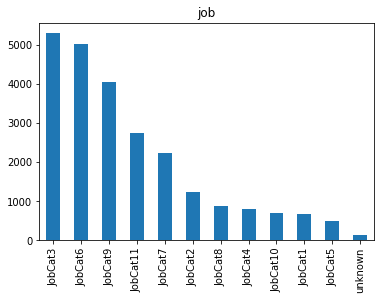

In [16]:
df['job'].value_counts().plot(kind='bar', title='job')

<AxesSubplot:title={'center':'marital'}>

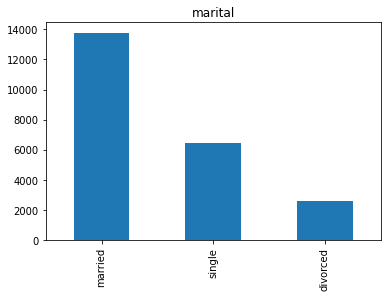

In [17]:
df['marital'].value_counts().plot(kind='bar',  title='marital')

<AxesSubplot:title={'center':'education'}>

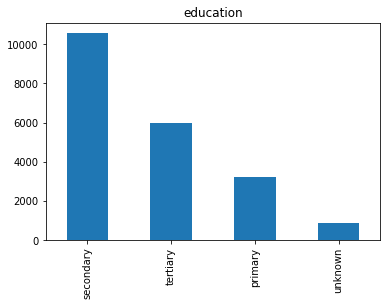

In [18]:
df['education'].value_counts().plot(kind='bar',  title='education')

<AxesSubplot:title={'center':'default'}>

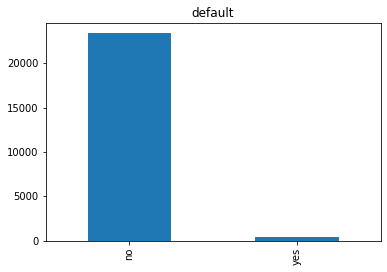

In [19]:
df['default'].value_counts().plot(kind='bar', title='default')

<AxesSubplot:title={'center':'housing'}>

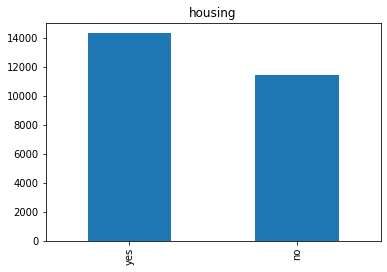

In [20]:
df['housing'].value_counts().plot(kind='bar',  title='housing')

<AxesSubplot:title={'center':'loan'}>

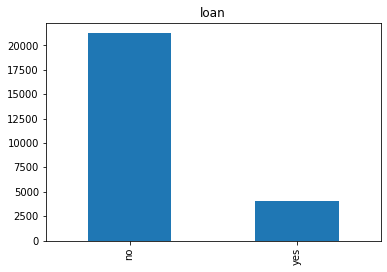

In [21]:
df['loan'].value_counts().plot(kind='bar', title='loan')

<AxesSubplot:title={'center':'contact'}>

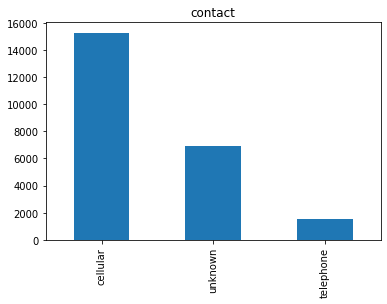

In [22]:
df['contact'].value_counts().plot(kind='bar',  title='contact')

<AxesSubplot:title={'center':'month'}>

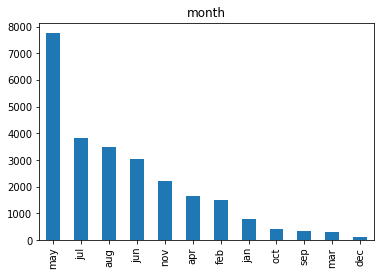

In [23]:
df['month'].value_counts().plot(kind='bar', title='month')

<AxesSubplot:title={'center':'poutcome'}>

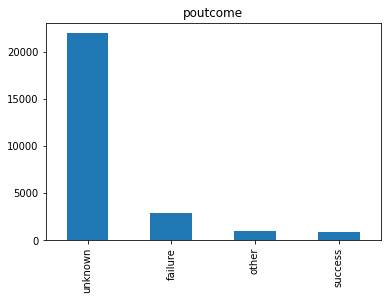

In [24]:
df['poutcome'].value_counts().plot(kind='bar',  title='poutcome')

>  #### Target features 
> Let's not forget the target feature. Given that it is a categorical feature, we'll use a bar plot.

<AxesSubplot:title={'center':'target feature'}>

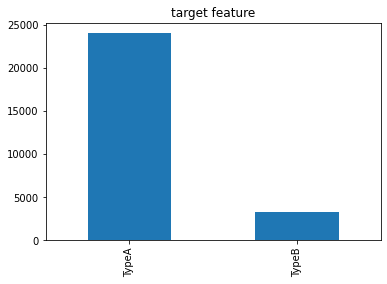

In [25]:
df['y'].value_counts().plot(kind='bar',  title='target feature')

## Bonus 1 - Ploting several features at once

Let's now see how we can visualize several features at once using `pandas` and the `matplotlib` [docs](https://matplotlib.org/contents.html) modules.

For ploting several features at once, we will create a `figure` using matplotlib built-in function `subplots`. The `figure` object will hold the invidual plots. Therefore, when we create that object, we must inform how many rows and how many columns that figure will contain. In addition, we have to define the size of the figure using the `figsize` parameter. 

This is a sample of how the code will look like:

```{python} 
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(18, 12))
```

The `fig` variable contains the figure itself. The `axes` variables contains an object that represent the positions and a reference for each plots within the figure. The reference contained in `axes` is a coordinate system that we can reference using the syntax:

```{python}
[row_index, column_index]
```

***Tip***:  sometimes it can be hard to identify separations of values of features in plots generated with `matplotlib` . It is also difficult to identify the values for frequency as well. To help this out, we'll use a python module called `seaborn` [docs](https://seaborn.pydata.org/). To make the plots look a bit nicer we must import the `seaborn` module and call the built-in function `set`. That will change the default look and feel of the plots, including plots generated with `pandas`.

***Tip 2:*** put the code for setting `seaborn` look and feel at the top of the jupyter notebook to change all `matplotlib` plots.

***Tip 3:*** once the plots are in place, use the function `tight_layout` to fit all the plots in the image and organize the titles, labels and legends.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Continuous features - histograms

There are 7 continuous features in our datasets. Let's create a figure with 3 columns to plot our features. That way, we need to create a figure with 3 rows of plots. This will leave us with 9 positions in the figure: 

$3\text{ rows}\times3\text{ columns}=9 \text{ positions}$

Once we have the coordinates, we inform the position of each plot in the `ax` parameter of the plot `function`.

Now that we have the figure and the reference to the axes, lets generate all plots at once. When we do that, we must tell the `plot` function to position the plot in a particular coordinate of the figure. Once we plot all features, we can proceed to remove the 'empty' plots (there will be 2 empty plots as we have 9 positions and only 7 features).

For more details see the comments in the code below.

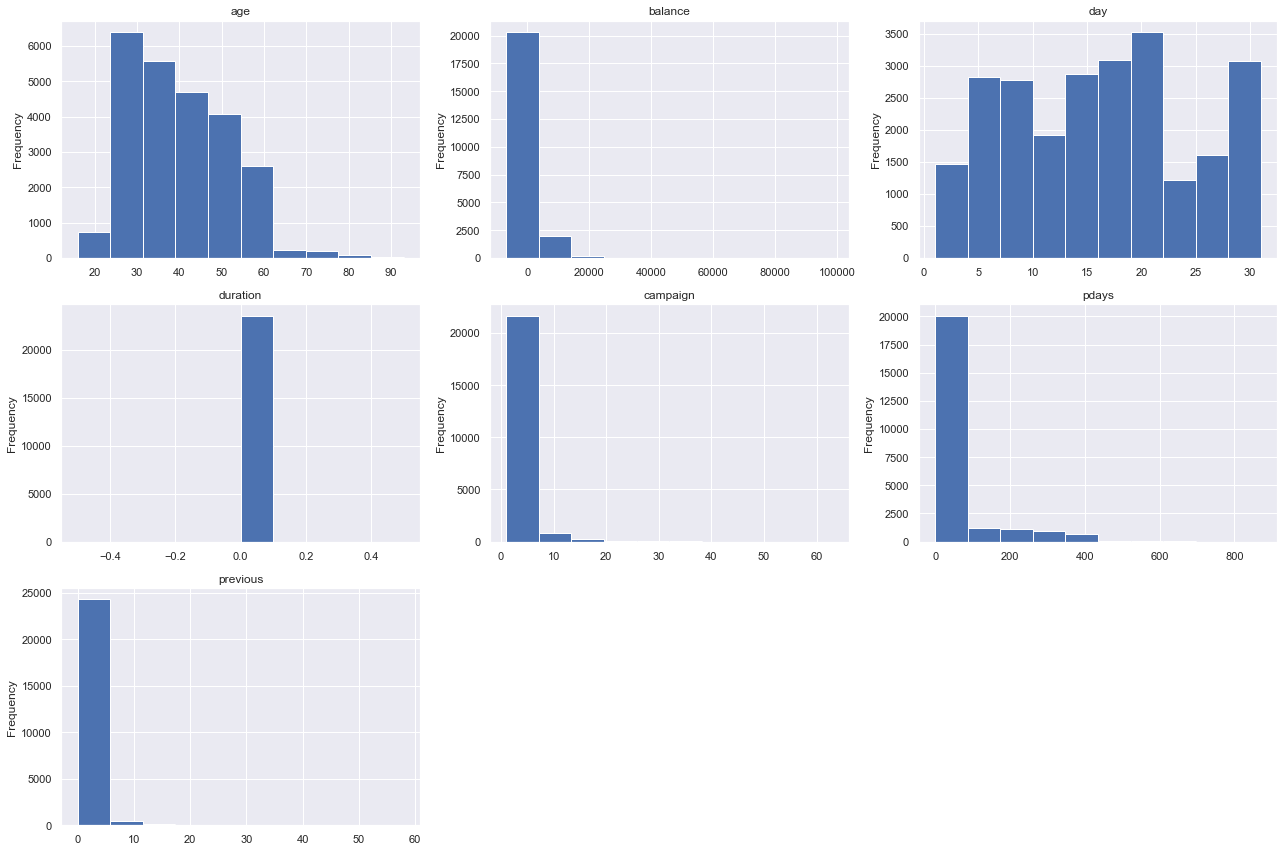

In [27]:
# let's create the figure and axes wit 3 rows anc 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# now we create the plots, informing the coordinate
df['age'].plot(kind='hist', ax=axes[0, 0], title='age')  # position [0, 0]
df['balance'].plot(kind='hist', ax=axes[0, 1], title='balance') # position [0, 1]
df['day'].plot(kind='hist', ax=axes[0, 2], title='day') # position [0, 2]
df['duration'].plot(kind='hist', ax=axes[1, 0], title='duration') # position [1, 0]
df['campaign'].plot(kind='hist', ax=axes[1, 1], title='campaign') # position [1, 1]
df['pdays'].plot(kind='hist', ax=axes[1, 2], title='pdays') # position [1, 2]
df['previous'].plot(kind='hist', ax=axes[2, 0], title='previous') # position [2, 0]

# now we remove the plots
fig.delaxes(axes[2, 1]) # position [2, 1]
fig.delaxes(axes[2, 2]) # position [2, 2]

# here we tidy the figure layout
plt.tight_layout()

### Categorical features - bar plots

There are 9 categorical features in our datasets. Let's create a figure with 3 columns to plot our features. That way, we need once again to create a figure with 3 rows of plots. This will leave us with 9 positions in the figure: 

$3\text{ rows}\times3\text{ columns}=9 \text{ positions}$

There will be no empty plots in the figure. The rest of the process is the same as for categorical features. For more details see the comments in the code below.

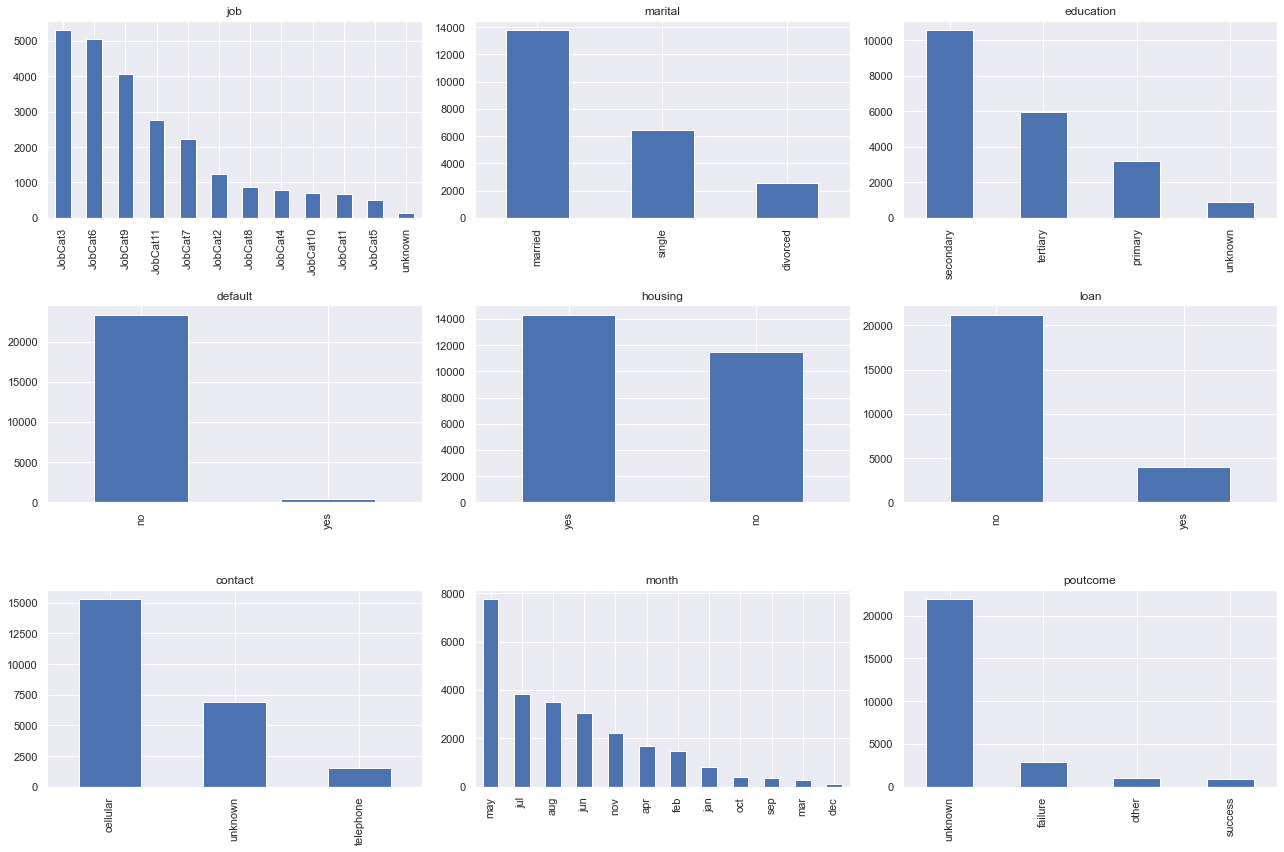

In [28]:
# let's create the figure and axes wit 3 rows anc 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# now we create the plots, informing the coordinate - notice that we have to use
# the value_couts function because we're ploting categorical features
df['job'].value_counts().plot(kind='bar', ax=axes[0, 0], title='job') # position [0, 0]
df['marital'].value_counts().plot(kind='bar', ax=axes[0, 1], title='marital') # position [0, 1]
df['education'].value_counts().plot(kind='bar', ax=axes[0, 2], title='education') # position [0, 2]
df['default'].value_counts().plot(kind='bar', ax=axes[1, 0], title='default') # position [1, 0]
df['housing'].value_counts().plot(kind='bar', ax=axes[1, 1], title='housing')# position [1, 1]
df['loan'].value_counts().plot(kind='bar', ax=axes[1, 2], title='loan') # position [1, 2]
df['contact'].value_counts().plot(kind='bar', ax=axes[2, 0], title='contact') # position [2, 0]
df['month'].value_counts().plot(kind='bar', ax=axes[2, 1], title='month') # position [2, 1]
df['poutcome'].value_counts().plot(kind='bar', ax=axes[2, 2], title='poutcome') # position [2, 2]

# here we tidy the figure layout
plt.tight_layout()

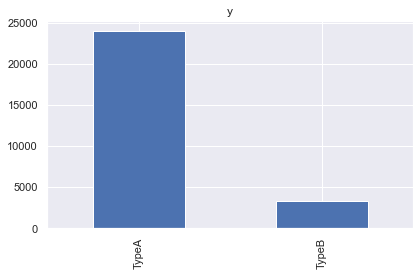

In [29]:
df['y'].value_counts().plot(kind='bar', title='y')
plt.tight_layout()

### Bonus 2 - Plot features using a foor loop

First we must separete the column into lists of their types:

In [30]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### Categorical plots

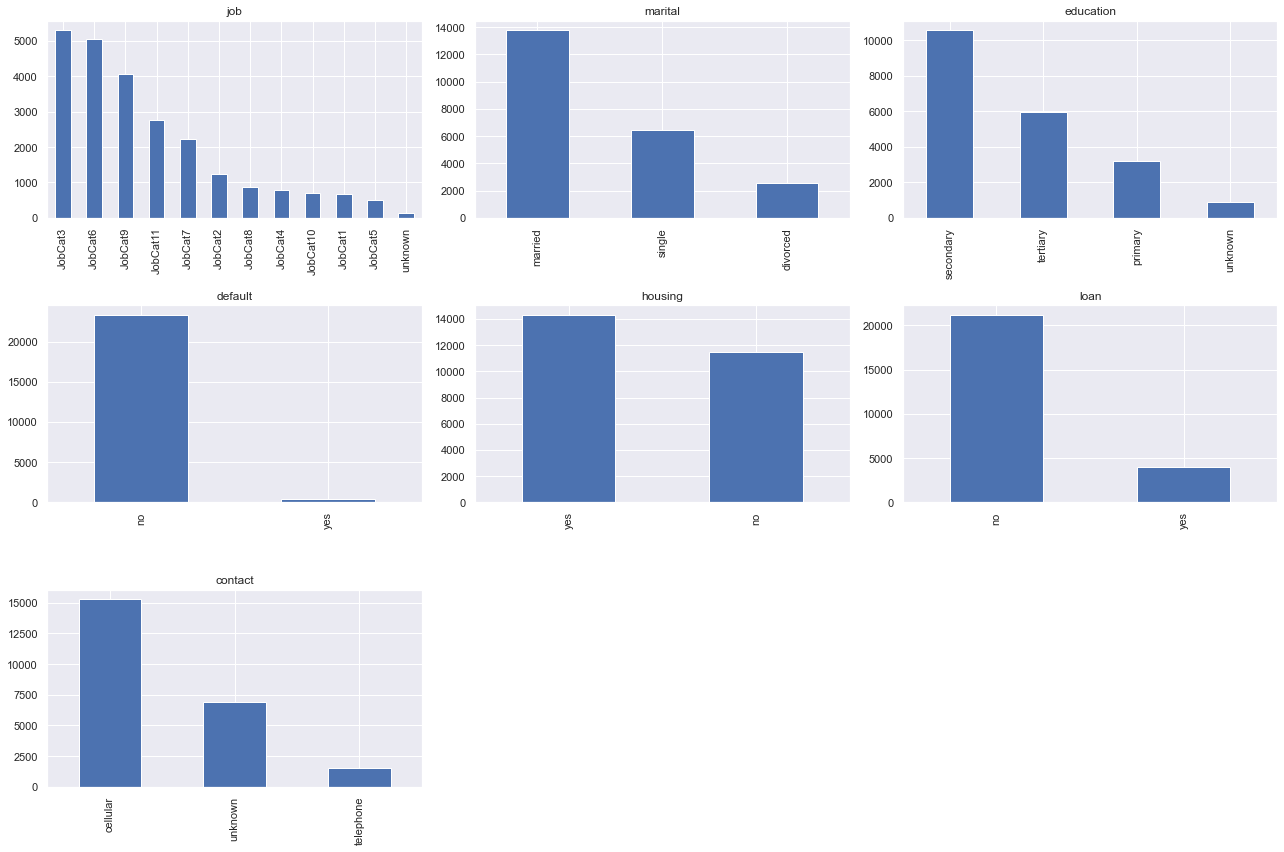

In [31]:
n_cols = 3  # define the number of columns

# now we check if the number of columns of that type is divisible by the number
# of columns we defined
if len(categorical_columns) % n_cols == 0:  # if it is devisible (no remainder)
    n_rows = int(len(categorical_columns) / n_cols)
else:  # if it is not devisible (no remainder)
    n_rows = int(len(categorical_columns) / n_cols) + 1

# define the figure and its subplots
fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=(18, 12))

cur_col = 0 # here we'll store the current column of the plot we are at
cur_row = 0 # here we'll store the current row of the plot we are at

for column_name in categorical_columns:  # iterate over the column's names
    # define the plot passing current row and column to the axes param of the plot
    df[column_name].value_counts().plot(kind='bar', ax=axes[cur_row, cur_col], title=column_name)
    # once we add a new plot, we must move one column to the right, so we add 1 to
    # the current count of columns
    cur_col += 1
    # after, we must check we are still within the boundaries (remember that python
    # start indexing at 0)
    if cur_col == n_cols: # if we are beyond the boundary:
        cur_row += 1  # move to the next row (i.e., increment the row count)
        cur_col = 0 # reset the count of columns (i.e., position at the first column)

# remove unused axes
for ax in axes.flat[len(numerical_columns):]:
    ax.remove()        

# clean layout   
plt.tight_layout()

#### Numerical plots

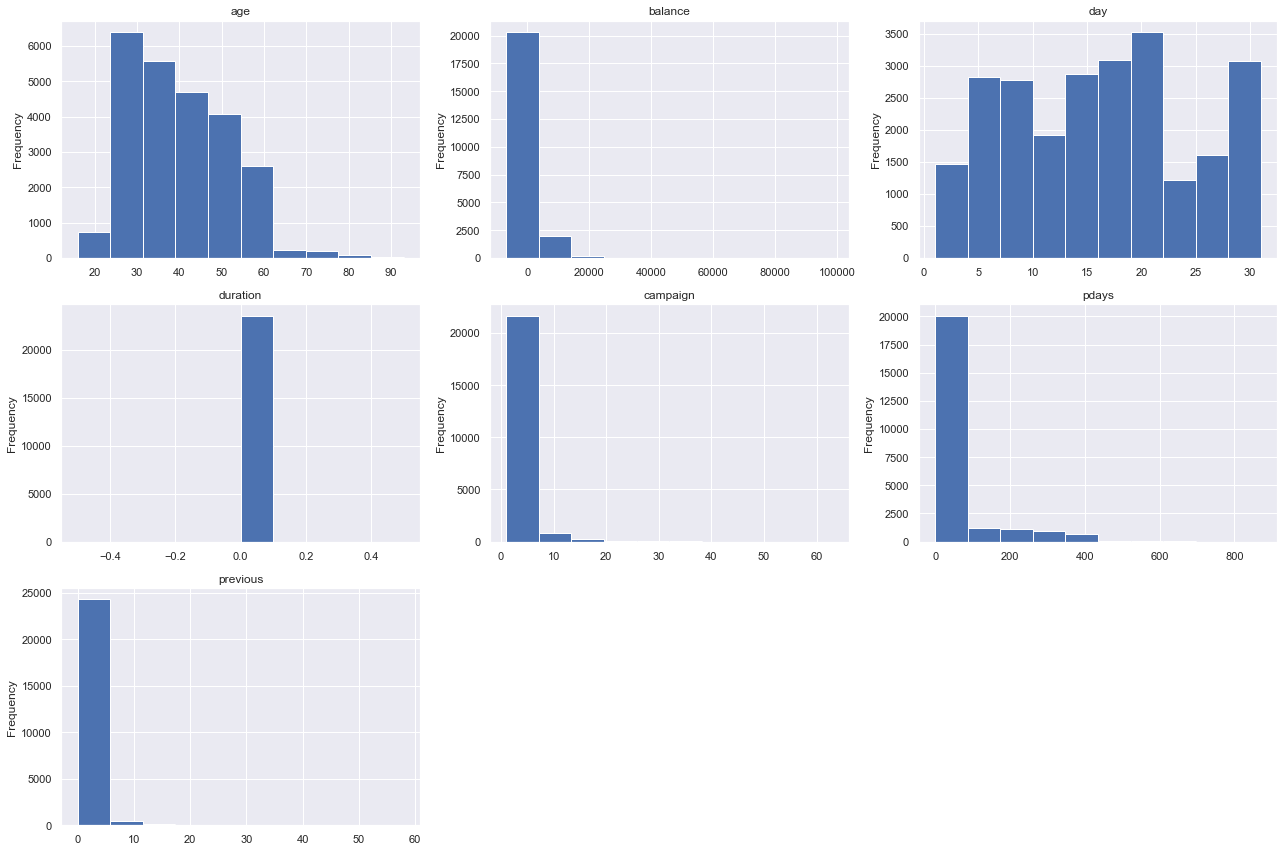

In [32]:
n_cols = 3  # define the number of columns

# now we check if the number of columns of that type is divisible by the number
# of columns we defined
if len(numerical_columns) % n_cols == 0:  # if it is devisible (no remainder)
    n_rows = int(len(numerical_columns) / n_cols)
else:  # if it is not devisible (no remainder)
    n_rows = int(len(numerical_columns) / n_cols) + 1

# define the figure and its subplots
fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=(18, 12))

cur_col = 0 # here we'll store the current column of the plot we are at
cur_row = 0 # here we'll store the current row of the plot we are at

for column_name in numerical_columns:  # iterate over the column's names
    # define the plot passing current row and column to the axes param of the plot
    df[column_name].plot(kind='hist', ax=axes[cur_row, cur_col], title=column_name)
    # once we add a new plot, we must move one column to the right, so we add 1 to
    # the current count of columns
    cur_col += 1
    # after, we must check we are still within the boundaries (remember that python
    # start indexing at 0)
    if cur_col == n_cols: # if we are beyond the boundary:
        cur_row += 1  # move to the next row (i.e., increment the row count)
        cur_col = 0 # reset the count of columns (i.e., position at the first column)

# remove unused axes
for ax in axes.flat[len(numerical_columns):]:
    ax.remove()       

# clean layout     
plt.tight_layout()

## Challenge

Choose one of the two methods above (Bonus 1 or Bonus 2) and try to combine the plots for all features (continuous and categoricals) in a single plot.

In [ ]:
# write your code here